In [49]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [50]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [52]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [53]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [54]:
# View all of the classes that automap found
for class_name in Base.classes.keys():
    print(class_name)

station
measurement


In [55]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [56]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [57]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date

'2017-08-23'

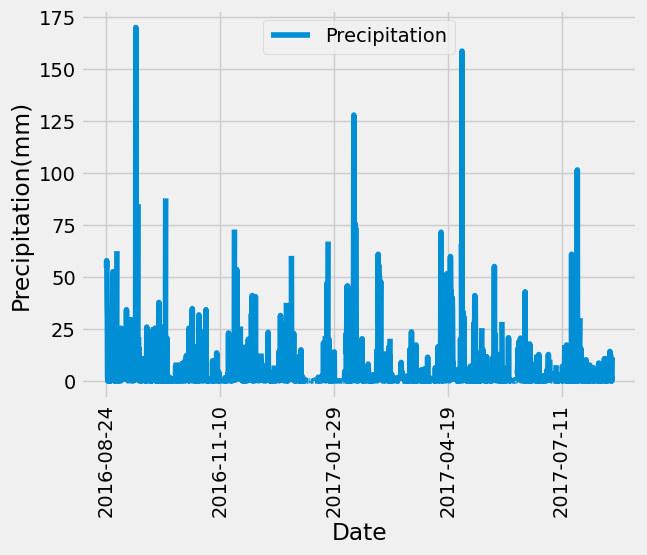

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation = pd.DataFrame(date_prcp, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation = precipitation.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation.plot(x='Date', y='Precipitation', legend = True)
plt.xlabel('Date')
plt.ylabel('Precipitation(mm)')
plt.xticks(rotation=90)
plt.show()


In [59]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [60]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(func.count(station.station)).scalar()
stations_count

9

In [61]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

for station, count in active_stations:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [62]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tempratures = session.query(func.min(measurement.tobs),func.max(measurement.tobs),
    func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()
print(tempratures)

[(12.2, 29.4, 22.03582251082252)]


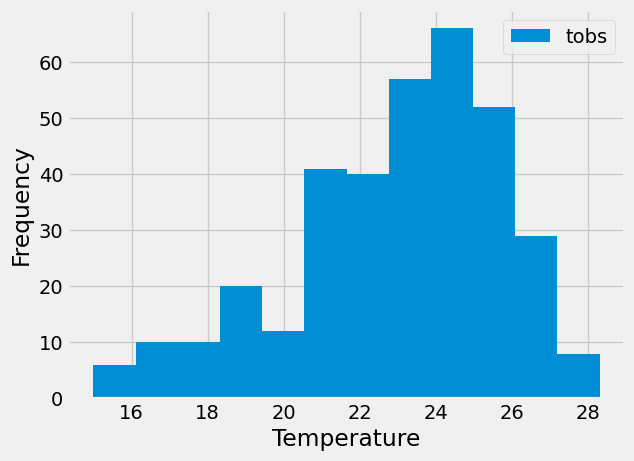

In [63]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temp = session.query(measurement.tobs).\
    filter(measurement.station == "USC00519281", measurement.date >= one_year_ago).all()

temperatures = [temp[0] for temp in last_year_temp]
plt.hist(temperatures, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

# Close Session

In [16]:
# Close Session
session.close()